## User Engagement Analysis

 Track the user’s engagement using the following engagement metrics: 
- sessions frequency 
- the duration of the session 
- the sessions total traffic (download and upload (bytes))

In [58]:
# Load Libraries and Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

###  Load The data 

In [59]:
df = pd.read_csv('../data/clean_data.csv')

In [60]:
df.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,1.311448e+19,770.0,662.0,104608.43895,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,23.0,...,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,4/4/2019 12:01,4/25/2019 14:35,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F
1,1.311448e+19,235.0,606.0,104608.43895,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,16.0,...,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,4/9/2019 13:04,4/25/2019 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,1.311448e+19,1.0,652.0,104608.43895,2.082003e+14,3.376063e+10,3.528151e+13,45.0,5.0,6.0,...,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,4/9/2019 17:42,4/25/2019 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,1.311448e+19,486.0,171.0,104608.43895,2.082014e+14,3.375034e+10,3.535661e+13,45.0,5.0,44.0,...,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,4/10/2019 0:31,4/25/2019 7:36,T21824A,undefined,undefined
4,1.311448e+19,565.0,954.0,104608.43895,2.082014e+14,3.369980e+10,3.540701e+13,45.0,5.0,6.0,...,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,4/12/2019 20:10,4/25/2019 10:40,D88865A,Samsung,Samsung Sm-G390F


In [61]:
df.columns.tolist()

['Bearer Id',
 'Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL 

In [62]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.488370e+05,148837.000000,148837.000000,148837.000000,1.488370e+05,1.488370e+05,1.488370e+05,148837.000000,148837.000000,148837.000000,...,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05,1.488370e+05
mean,1.013886e+19,499.163743,498.678642,96287.502612,2.082016e+14,4.188820e+10,4.847882e+13,94.548573,15.317959,13314.214127,...,1.163360e+07,1.100944e+07,1.162611e+07,1.100259e+07,4.221243e+08,8.290760e+06,4.211534e+08,8.263305e+06,4.112267e+07,4.547221e+08
std,2.893144e+18,288.621038,288.100318,54532.009711,2.153075e+10,2.448249e+12,2.241713e+13,528.309259,76.788359,24013.820216,...,6.711085e+06,6.345340e+06,6.725142e+06,6.358787e+06,2.439955e+08,4.781462e+06,2.431781e+08,4.768782e+06,1.125839e+07,2.441684e+08
min,6.917538e+18,0.000000,0.000000,7142.000000,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.324119e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,58151.000000,2.082014e+14,3.365140e+10,3.546071e+13,35.000000,3.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777563e+06,5.476694e+06,2.106002e+08,4.133141e+06,2.103064e+08,4.144464e+06,3.322627e+07,2.432136e+08
50%,7.349883e+18,499.000000,500.000000,86399.000000,2.082015e+14,3.366371e+10,3.572211e+13,45.000000,5.000000,63.000000,...,1.161415e+07,1.101188e+07,1.164062e+07,1.099935e+07,4.235603e+08,8.293617e+06,4.218317e+08,8.266766e+06,4.113922e+07,4.560453e+08
75%,1.304243e+19,749.000000,750.000000,124251.000000,2.082018e+14,3.368331e+10,8.611970e+13,61.000000,11.000000,19765.000000,...,1.744780e+07,1.651545e+07,1.747004e+07,1.650605e+07,6.332922e+08,1.243249e+07,6.317047e+08,1.238209e+07,4.902835e+07,6.657757e+08
max,1.318654e+19,999.000000,999.000000,278803.000000,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.483343e+07,9.029696e+08


******Sessions frequency******

In [24]:
# Get sessions frequency (count the number of sessions)
sessions_frequency = df.groupby('MSISDN/Number')['Bearer Id'].count()
sessions_frequency

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Bearer Id, Length: 106352, dtype: int64

****Session duration****

In [25]:
# Calculate session duration
session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].sum()
session_duration

MSISDN/Number
3.360100e+10    116720.00000
3.360100e+10    181230.00000
3.360100e+10    134969.00000
3.360101e+10     49878.00000
3.360101e+10     37104.00000
                    ...     
3.379000e+10      8810.00000
3.379000e+10    140988.00000
3.197021e+12    104608.43895
3.370000e+14    253030.00000
8.823971e+14    104608.43895
Name: Dur. (ms), Length: 106352, dtype: float64

**Sessions total traffic (download and upload (bytes))**

In [26]:
# Calculate total traffic
df['Total Traffic (Bytes)'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
# Calculate total traffic per user
total_traffic_per_user = df.groupby('MSISDN/Number')['Total Traffic (Bytes)'].sum()
# Display the result
print(total_traffic_per_user)

MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3.379000e+10    7.146416e+08
3.379000e+10    4.803073e+08
3.197021e+12    2.321240e+08
3.370000e+14    5.962878e+08
8.823971e+14    1.391536e+08
Name: Total Traffic (Bytes), Length: 106352, dtype: float64


**Task 3.1 - Based on the above submit python script and slide**
- Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 
- Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 
- Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
- Aggregate user total traffic per application and derive the top 10 most engaged users per application
- Plot the top 3 most used applications using appropriate charts.  
- Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
   - What is the optimized value of k (use elbow method for this)?  
   - Interpret your findings


**Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metri**
  - Sessions Frequency
  - Session Duration (s)
  - Total Traffic (Bytes)

In [27]:
# Combine metrics into a single DataFrame
engagement_metrics = pd.DataFrame({
    'Sessions Frequency': sessions_frequency,
    'session_duration': session_duration,
    'Total Traffic (Bytes)': total_traffic_per_user
})

# top 10 customers for each metric
top_10_sessions_frequency = engagement_metrics['Sessions Frequency'].nlargest(10)
top_10_session_duration = engagement_metrics['session_duration'].nlargest(10)
top_10_total_traffic = engagement_metrics['Total Traffic (Bytes)'].nlargest(10)

In [28]:
top_10_sessions_frequency

MSISDN/Number
3.366371e+10    492
3.362632e+10     18
3.361489e+10     17
3.362578e+10     17
3.365973e+10     16
3.367588e+10     15
3.376054e+10     15
3.366716e+10     13
3.360313e+10     12
3.360452e+10     12
Name: Sessions Frequency, dtype: int64

In [29]:
# to create a subplot of histograms 'source GPT3'
def mult_hist(sr, rows, cols, title_text, subplot_titles, interactive=False):
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)
    for i in range(rows):
        for j in range(cols):
            x = ["-> " + str(i) for i in sr[i+j].index]
            fig.add_trace(go.Bar(x=x, y=sr[i+j].values), row=i+1, col=j+1)
    fig.update_layout(showlegend=False, title_text=title_text)
    if(interactive):
        fig.show()
    else:
        return Image(pio.to_image(fig, format='png', width=1200))

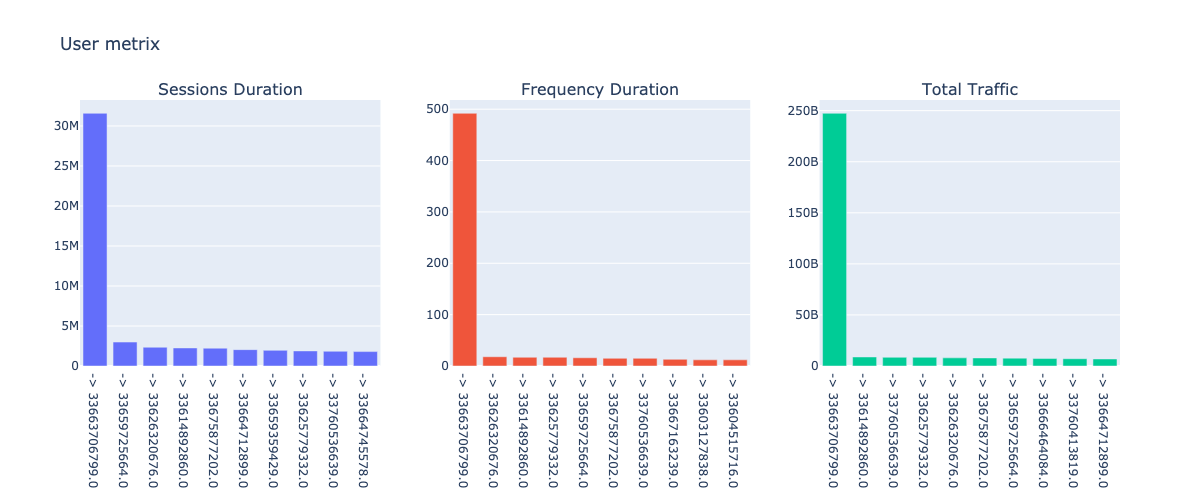

In [30]:

mult_hist([top_10_session_duration, top_10_sessions_frequency,
           top_10_total_traffic], 1,3, "User metrix",
          ['Sessions Duration', 'Frequency Duration','Total Traffic']
         )

- **Normalize each engagement metric**
- **Run a k-means (k=3) to classify customers in three groups of engagement.** 

In [31]:
engagement_metrics.describe()

,Sessions Frequency,session_duration,Total Traffic (Bytes)
count,106352.000000,1.063520e+05,1.063520e+05
mean,1.399475,1.347520e+05,6.939226e+08
std,1.707035,1.482298e+05,9.022445e+08
min,1.000000,7.142000e+03,3.324901e+07
25%,1.000000,7.272950e+04,3.588455e+08
50%,1.000000,1.014910e+05,6.183981e+08
75%,2.000000,1.727980e+05,8.579399e+08
max,492.000000,3.158071e+07,2.474288e+11


In [38]:
engagement_metrics['Total Traffic (Bytes)']

MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3.379000e+10    7.146416e+08
3.379000e+10    4.803073e+08
3.197021e+12    2.321240e+08
3.370000e+14    5.962878e+08
8.823971e+14    1.391536e+08
Name: Total Traffic (Bytes), Length: 106352, dtype: float64

**Normalise each metric unsind MIN-MAX**

In [39]:
# Use the Min-Max scaling formula: (x - min) / (max - min) value bln [0,1]
engagement_metrics['Sessions Frequency'] = (engagement_metrics['Sessions Frequency'] - engagement_metrics['Sessions Frequency'].min()) / (engagement_metrics['Sessions Frequency'].max() - engagement_metrics['Sessions Frequency'].min())

In [40]:
# Use the Min-Max scaling formula: (x - min) / (max - min) value bln [0,1]
engagement_metrics['session_duration'] = (engagement_metrics['session_duration'] - engagement_metrics['session_duration'].min()) / (engagement_metrics['session_duration'].max() - engagement_metrics['session_duration'].min())

In [41]:
# Use the Min-Max scaling formula: (x - min) / (max - min) value bln [0,1]
engagement_metrics['session_duration'] = (engagement_metrics['session_duration'] - engagement_metrics['session_duration'].min()) / (engagement_metrics['session_duration'].max() - engagement_metrics['session_duration'].min())

In [42]:
# Use the Min-Max scaling formula: (x - min) / (max - min) value bln [0,1]
engagement_metrics['Total Traffic (Bytes)']['Total Traffic (Bytes)'] = (engagement_metrics['Total Traffic (Bytes)'] - engagement_metrics['Total Traffic (Bytes)'].min()) / (engagement_metrics['Total Traffic (Bytes)'].max() - engagement_metrics['Total Traffic (Bytes)'].min())


***k-means (k=3) to classify customers in three groups of engagement.*** 


In [43]:
Km = KMeans(n_clusters=3, n_init=10)
Km

KMeans(n_clusters=3, n_init=10)

In [44]:
model_predicted =Km.fit_predict(engagement_metrics[['Sessions Frequency','session_duration','Total Traffic (Bytes)']])
model_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [47]:
engagement_metrics['clusters'] = model_predicted

In [48]:
engagement_metrics.head()

,Sessions Frequency,session_duration,Total Traffic (Bytes),clusters
MSISDN/Number,,,,
3.360100e+10,0.000000,0.003471,8.786906e+08,0
3.360100e+10,0.000000,0.005514,1.568596e+08,0
3.360100e+10,0.000000,0.004049,5.959665e+08,0
3.360101e+10,0.000000,0.001354,4.223207e+08,0
3.360101e+10,0.002037,0.000949,1.457411e+09,2


In [52]:
engagement_metrics['clusters'].unique()

array([0, 2, 1], dtype=int32)

In [56]:
df1 = engagement_metrics[engagement_metrics.clusters==0]
df2 = engagement_metrics[engagement_metrics.clusters==1]
df3 = engagement_metrics[engagement_metrics.clusters==2]

In [63]:
df1.head()

,Sessions Frequency,session_duration,Total Traffic (Bytes),clusters
MSISDN/Number,,,,
3.360100e+10,0.000000,0.003471,878690574.0,0
3.360100e+10,0.000000,0.005514,156859643.0,0
3.360100e+10,0.000000,0.004049,595966483.0,0
3.360101e+10,0.000000,0.001354,422320698.0,0
3.360101e+10,0.002037,0.007818,615217221.0,0
